In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
#Import the datetime module from the datetime library
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count = 1
set_count = 1



Beginning Data Retrieval
------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kimbe
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | awbari
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | el alto
Processing Record 22 of Set 1 | khomutovka
Pro

Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | hovd
Processing Record 42 of Set 4 | yuyao
Processing Record 43 of Set 4 | denekamp
Processing Record 44 of Set 4 | rudbar
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | sidi ali
Processing Record 47 of Set 4 | rinteln
Processing Record 48 of Set 4 | portoferraio
Processing Record 49 of Set 4 | antofagasta
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | birpur
Processing Record 2 of Set 5 | nabire
Processing Record 3 of Set 5 | mineiros
Processing Record 4 of Set 5 | araouane
Processing Record 5 of Set 5 | kaiwaka
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | aguimes
Processing Record 8 of Set 5 | mangrol
Processing Record 9 of Set 5 | dunda
Processing Record 10 of Set 5 | mandalgovi
Processing Record 11 of Set 5 | chapais
Processing Record 12 of Set 5 | vanimo
Processing Record 13 of Set 5 | cabra
Proce

Processing Record 30 of Set 8 | cayenne
Processing Record 31 of Set 8 | fairbanks
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | qandala
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | arona
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | benguela
Processing Record 39 of Set 8 | ulaanbaatar
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | sabinas hidalgo
Processing Record 43 of Set 8 | lompoc
Processing Record 44 of Set 8 | caramay
Processing Record 45 of Set 8 | nemuro
Processing Record 46 of Set 8 | bakchar
Processing Record 47 of Set 8 | honningsvag
Processing Record 48 of Set 8 | gjirokaster
Processing Record 49 of Set 8 | miri
Processing Record 50 of Set 8 | minab
Processing Record 1 of Set 9 | norwalk
Processing Record 2 of Set 9 | san buenaventura
Processin

Processing Record 14 of Set 12 | havre-saint-pierre
Processing Record 15 of Set 12 | harbour breton
Processing Record 16 of Set 12 | turtkul
City not found. Skipping...
Processing Record 17 of Set 12 | kampong chhnang
Processing Record 18 of Set 12 | aksarka
Processing Record 19 of Set 12 | batagay
Processing Record 20 of Set 12 | jinsha
Processing Record 21 of Set 12 | loreto
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | port hedland
Processing Record 24 of Set 12 | constantine
Processing Record 25 of Set 12 | maldonado
Processing Record 26 of Set 12 | katha
City not found. Skipping...
Processing Record 27 of Set 12 | mhlume
Processing Record 28 of Set 12 | tenenkou
Processing Record 29 of Set 12 | huarmey
Processing Record 30 of Set 12 | shamkhal
Processing Record 31 of Set 12 | shimoda
Processing Record 32 of Set 12 | aljezur
Processing Record 33 of Set 12 | klamath falls
Processing Record 34 of Set 12 | emirdag
Processing Record 35 of Set 12 | okha

In [11]:
len(city_data)

565

In [12]:
#Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,65.28,59,75,2.30,CA,2021-06-05 19:22:04
1,Faanui,-16.4833,-151.7500,80.62,74,98,8.19,PF,2021-06-05 19:22:04
2,Georgetown,5.4112,100.3354,79.90,92,40,2.30,MY,2021-06-05 19:22:04
3,Saint George,37.1041,-113.5841,104.63,12,1,1.99,US,2021-06-05 19:21:01
4,Rikitea,-23.1203,-134.9692,75.56,80,100,11.52,PF,2021-06-05 19:21:17
5,Kimbe,-5.5502,150.1429,74.39,91,26,4.41,PG,2021-06-05 19:22:05
6,Cape Town,-33.9258,18.4232,60.12,70,0,4.00,ZA,2021-06-05 19:22:05
7,Hobart,-42.8794,147.3294,45.05,75,75,4.61,AU,2021-06-05 19:22:05
8,Ushuaia,-54.8000,-68.3000,33.46,80,40,6.91,AR,2021-06-05 19:22:06
9,Saint-Philippe,-21.3585,55.7679,74.48,82,13,2.04,RE,2021-06-05 19:22:06


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-06-05 19:22:04,62.4560,-114.3525,65.28,59,75,2.30
1,Faanui,PF,2021-06-05 19:22:04,-16.4833,-151.7500,80.62,74,98,8.19
2,Georgetown,MY,2021-06-05 19:22:04,5.4112,100.3354,79.90,92,40,2.30
3,Saint George,US,2021-06-05 19:21:01,37.1041,-113.5841,104.63,12,1,1.99
4,Rikitea,PF,2021-06-05 19:21:17,-23.1203,-134.9692,75.56,80,100,11.52
5,Kimbe,PG,2021-06-05 19:22:05,-5.5502,150.1429,74.39,91,26,4.41
6,Cape Town,ZA,2021-06-05 19:22:05,-33.9258,18.4232,60.12,70,0,4.00
7,Hobart,AU,2021-06-05 19:22:05,-42.8794,147.3294,45.05,75,75,4.61
8,Ushuaia,AR,2021-06-05 19:22:06,-54.8000,-68.3000,33.46,80,40,6.91
9,Saint-Philippe,RE,2021-06-05 19:22:06,-21.3585,55.7679,74.48,82,13,2.04


In [15]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

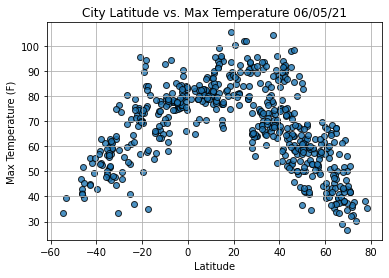

In [17]:
#Import time module
import time

#Build scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorportate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))



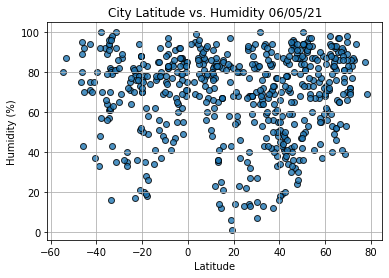

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

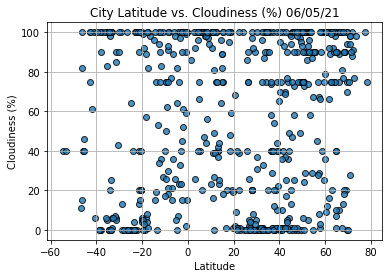

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

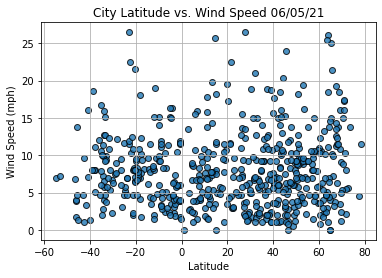

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                       Narsaq
Country                        GL
Date          2021-06-05 19:22:08
Lat                       60.9167
Lng                        -46.05
Max Temp                    59.22
Humidity                       61
Cloudiness                    100
Wind Speed                  10.63
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

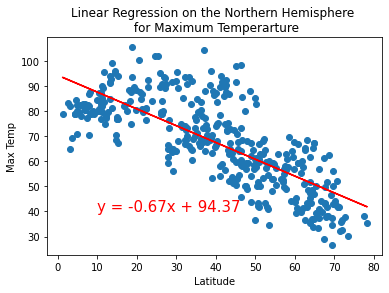

Text(0.5, 0, 'Latitude')

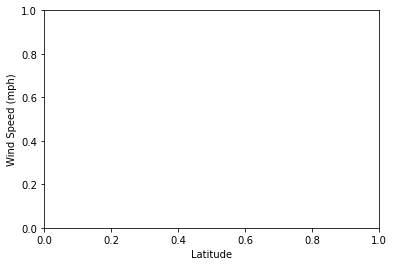

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperarture")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Input title and labels
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f'"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-56-1cfa9d57d762>, line 4)

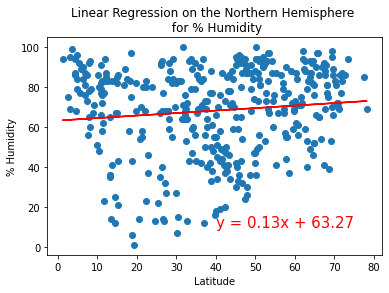

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

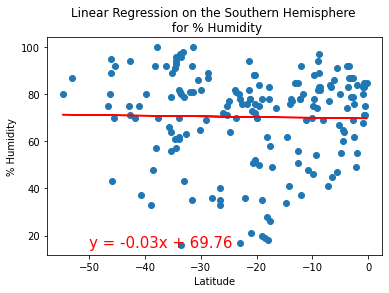

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

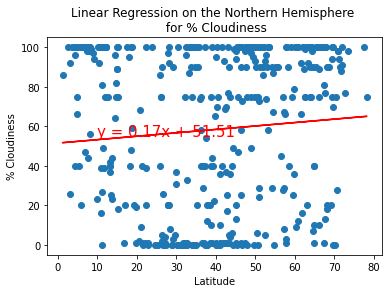

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

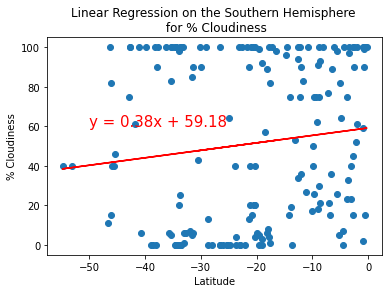

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

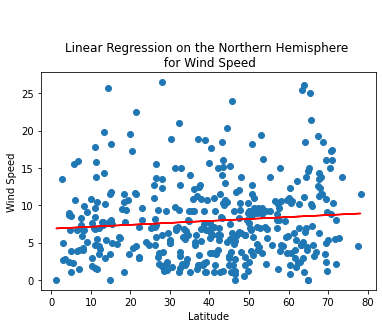

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

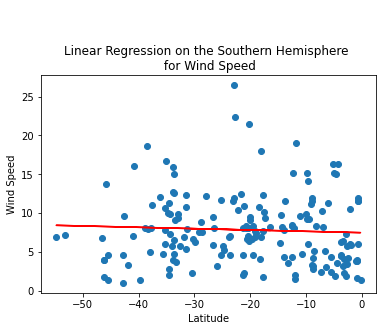

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))